In [ ]:
# installs

In [1]:
# imports
import pandas as pd
import csv
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import keras.backend as K
import matplotlib.pyplot as plt

In [2]:
seed = 43
np.random.seed(seed)
tf.random.set_seed(seed)

# Task1
---



> **1. Clean the data and do necessary pre-processing steps.**

In [3]:
# functions to enable the task

def preprocess(df):
  """
  input: pandas dataframe with two columns, sent and label
  description: sentence text preprocessing
  """
  punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  stop_words=['the', 'a', 'and', 'is', 'be', 'will']

  sentences = df.iloc[:, 0].values
  ret = []
  for sent in sentences:
    sent = re.sub(r'https?://\S+|www\.\S+', '', sent)                           #removing urls
    sent = re.sub(r'<.*?>', '', sent)                                           #removing html elements
    sent = sent.lower()                                                         #lowering all characters
    for ch in sent:                                                             #removing punctuations
      if ch in punctuations:
        sent = sent.replace(ch, '')
    sent = ' '.join([word for word in sent.split() if word not in stop_words])  #removing stop words
    sent = re.sub(r'\s+', ' ', sent).strip()                                    #removing whitespaces
    ret.append(sent)
  ret = np.asarray(ret)

  df['sent'] = ret
  return df

In [4]:
# calling the above functions to perform the task

!gdown --id 16UVvU8YpabFMEds5vsFhmuLnQ9jEKTAW
!unzip /content/datasets.zip &> /dev/null
!rm -rf /content/datasets.zip &> /dev/null
!rm -rf /content/__MACOSX &> /dev/null


#DATASET-1
data1 = pd.read_csv("/content/datasets/dataset_1.tsv", sep="[\t\n]", engine='python', header=None)
data1.columns=['sent', 'label']
data1 = data1.sample(frac=1).reset_index(drop=True) #shuffling, drop this if need to make inference on this dataset
print("-----------------------------------------------------------")
print(":::::::::::::::Dataset1 before preprocessing:::::::::::::::")
print("-----------------------------------------------------------")
display(data1)
print("-----------------------------------------------------------")
print(":::::::::::::::Dataset1 after preprocessing:::::::::::::::")
print("-----------------------------------------------------------")
data1 = preprocess(data1)
display(data1)


#DATASET-2
data2_neg = pd.read_csv("/content/datasets/rt-polarity.neg", sep="\n", header=None)
data2_neg['label'] = np.zeros(shape=len(data2_neg), dtype=int)
data2_neg.columns = ['sent', 'label']

data2_pos = pd.read_csv("/content/datasets/rt-polarity.pos", sep="\n", header=None)
data2_pos['label'] = np.ones(shape=len(data2_pos), dtype=int)
data2_pos.columns = ['sent', 'label']

data2 = pd.concat([data2_neg, data2_pos], ignore_index=True)
data2 = data2.sample(frac=1).reset_index(drop=True) #shuffling, drop this if need to make inference on this dataset
print("-----------------------------------------------------------")
print(":::::::::::::::Dataset2 before preprocessing:::::::::::::::")
print("-----------------------------------------------------------")
display(data2)
print("-----------------------------------------------------------")
print(":::::::::::::::Dataset2 after preprocessing:::::::::::::::")
print("-----------------------------------------------------------")
data2 = preprocess(data2)
display(data2)


Downloading...
From: https://drive.google.com/uc?id=16UVvU8YpabFMEds5vsFhmuLnQ9jEKTAW
To: /content/datasets.zip
100% 526k/526k [00:00<00:00, 33.8MB/s]
-----------------------------------------------------------
:::::::::::::::Dataset1 before preprocessing:::::::::::::::
-----------------------------------------------------------


,sent,label
0,"I won't spoil it, but the ending in pretty ama...",1
1,;) Recommend with confidence!,1
2,Maybe there would be a reasonable explanation ...,0
3,Duris has a wholesome appearance and gives a f...,1
4,The stories were as unbelievable as the actors.,0
...,...,...
995,I'm not sure what he was trying to do with thi...,0
996,You will leave the theater wanting to go out a...,1
997,That was nice.,1
998,This is actually a very smart movie.,1


-----------------------------------------------------------
:::::::::::::::Dataset1 after preprocessing:::::::::::::::
-----------------------------------------------------------


,sent,label
0,i wont spoil it but ending in pretty amazing,1
1,recommend with confidence,1
2,maybe there would reasonable explanation for t...,0
3,duris has wholesome appearance gives fine perf...,1
4,stories were as unbelievable as actors,0
...,...,...
995,im not sure what he was trying to do with this...,0
996,you leave theater wanting to go out dance unde...,1
997,that was nice,1
998,this actually very smart movie,1


-----------------------------------------------------------
:::::::::::::::Dataset2 before preprocessing:::::::::::::::
-----------------------------------------------------------


,sent,label
0,coughs and sputters on its own postmodern conc...,0
1,"it works well enough , since the thrills pop u...",1
2,"we never feel anything for these characters , ...",0
3,"the film has [its] moments , but they are few ...",0
4,scorsese doesn't give us a character worth giv...,0
...,...,...
10657,what starts off as a satisfying kids flck beco...,0
10658,"as an actress , madonna is one helluva singer ...",0
10659,ritchie's treatment of the class reversal is m...,0
10660,it's difficult to imagine the process that pro...,0


-----------------------------------------------------------
:::::::::::::::Dataset2 after preprocessing:::::::::::::::
-----------------------------------------------------------


,sent,label
0,coughs sputters on its own postmodern conceit,0
1,it works well enough since thrills pop up freq...,1
2,we never feel anything for these characters as...,0
3,film has its moments but they are few far between,0
4,scorsese doesnt give us character worth giving...,0
...,...,...
10657,what starts off as satisfying kids flck become...,0
10658,as an actress madonna one helluva singer as me...,0
10659,ritchies treatment of class reversal majorly h...,0
10660,its difficult to imagine process that produced...,0


> Observations
- Extracted the data into pandas dataframe.
- Length of dataset1 is 1000.
- Length of dataset2 is 10662.
- The samples in the dataset are arranged by class. So, shuffled the dataset.
- preprocessing:
  - removed url elements
  - removed html elements
  - lowered the characters
  - removed punctuations
  - removed stop words('the', 'a', 'and', 'is', 'be', 'will')
  - removed white spaces


> **2. Split the dataset into training and testing sets and do all comparison using the performance on test data.**

In [5]:
# functions to enable the task

def convert_strs_to_integers(strs):
  tokenizer = Tokenizer()

  max_len = np.max([len(sent.split()) for sent in strs])                        #finding max length of sentence
  print("Max Length of sentence(also length of input): ", max_len)

  tokenizer.fit_on_texts(strs)                                                   #converting text to numbers
  vocab_len = len(tokenizer.word_index)
  print("Length of vocabulary: ", vocab_len)
  seq = tokenizer.texts_to_sequences(strs)

  padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')               #extending the length of sequence
                                                                                #to max length by padding
                                                                  
  return padded_seq, max_len, vocab_len, tokenizer

In [6]:
# calling above functions to perform the task

#DATASET-1
print("-------------------------------------------------------------------")
print("::::::::::::::::::::::::::::::Dataset1::::::::::::::::::::::::::::::")
print("-------------------------------------------------------------------")
X1, INP_LEN1, VOCAB_LEN1, TOKENIZER1=convert_strs_to_integers(data1.iloc[:, 0].values)
Y1=tf.one_hot(data1.iloc[:, 1].values, depth=2).numpy()
TrainX1, ValX1, TrainY1, ValY1 = train_test_split(X1, Y1, test_size=0.3, random_state=seed)
print("TrainX1 shape: ", TrainX1.shape, " | ValX1 shape: ", ValX1.shape, " | TrainY1 shape: ", TrainY1.shape, " | ValY1 shape: ", ValY1.shape)

#DATASET-2
print("-------------------------------------------------------------------")
print("::::::::::::::::::::::::::::::Dataset2::::::::::::::::::::::::::::::")
print("-------------------------------------------------------------------")
X2, INP_LEN2, VOCAB_LEN2, TOKENIZER2=convert_strs_to_integers(data2.iloc[:, 0].values)
Y2=tf.one_hot(data2.iloc[:, 1].values, depth=2).numpy()
TrainX2, ValX2, TrainY2, ValY2 = train_test_split(X2, Y2, test_size=0.2, random_state=seed)
print("TrainX2 shape: ", TrainX2.shape, " | ValX2 shape: ", ValX2.shape, " | TrainY2 shape: ", TrainY2.shape, " | ValY2 shape: ", ValY2.shape)

-------------------------------------------------------------------
::::::::::::::::::::::::::::::Dataset1::::::::::::::::::::::::::::::
-------------------------------------------------------------------
Max Length of sentence(also length of input):  55
Length of vocabulary:  3167
TrainX1 shape:  (700, 55)  | ValX1 shape:  (300, 55)  | TrainY1 shape:  (700, 2)  | ValY1 shape:  (300, 2)
-------------------------------------------------------------------
::::::::::::::::::::::::::::::Dataset2::::::::::::::::::::::::::::::
-------------------------------------------------------------------
Max Length of sentence(also length of input):  43
Length of vocabulary:  20506
TrainX2 shape:  (8529, 43)  | ValX2 shape:  (2133, 43)  | TrainY2 shape:  (8529, 2)  | ValY2 shape:  (2133, 2)


> observations
- Converting the strings to integers by assigning each distinct word an integer.
- Maximum length of input sentence is stored for further usage(it is only the input length)
- Distinct words in the dataset is also stored for further usage(it is only the vocabulary length)
- The labels are encoded into one hot vectors.
- Dataset1 is smaller compared to dataset2. So, train:val split of 7:3 is used for dataset1 and 8:2 is used for dataset2


> **3. Use some method to perform word embedding.**

In [7]:
# functions to enable the task

def get_coefs(word, *arr): 
  return word, np.asarray(arr, dtype='float32')

def get_embeddings_matrix(embed_path, embed_dim, tokenizer, vocab_len):
  embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(embed_path, errors='ignore'))
  embedding_matrix = np.zeros((vocab_len + 1, embed_dim))
  for word, index in tokenizer.word_index.items():
    if index > vocab_len:
      break
    else:
      try:
          embedding_matrix[index] = embeddings_index[word]
      except:
          continue
  return embedding_matrix

In [8]:
# calling above functions to perform the task
# NOTE: This cell might take a while to run(around 5min), please DO NOR RE-RUN it!!(waste of time)

# glove.6B: https://drive.google.com/file/d/17QuRawroK6tXX7p3mwZiB4zEicNauvbi/view?usp=sharing
# glove.42B.300d: https://drive.google.com/file/d/1C4EF6dN5sE28XFm7CefcWBgzRwfF90Pz/view?usp=sharing
# glove.840B.300d: https://drive.google.com/file/d/1Otp9Q1hL5RY0Lv1pbJzcXTt1Xew7Uc3R/view?usp=sharing
# glove.twitter.27B: https://drive.google.com/file/d/16d15anhD8nRhorIy7RSF11RILk5AvaIY/view?usp=sharing

#glove.42B.300d.txt
!gdown --id 1C4EF6dN5sE28XFm7CefcWBgzRwfF90Pz
!unzip /content/glove.42B.300d.zip &> /dev/null
!rm -rf /content/glove.42B.300d.zip &> /dev/null

#DATASET-1
embed_path1 = '/content/glove.42B.300d.txt'
EMBED_DIM1 = 300
EMBEDDING_MATRIX1 = get_embeddings_matrix(embed_path1, EMBED_DIM1, TOKENIZER1, VOCAB_LEN1)
print("Embeddings Matrix shape: ", EMBEDDING_MATRIX1.shape)

#DATASET-2
embed_path2 = '/content/glove.42B.300d.txt'
EMBED_DIM2 = 300
EMBEDDING_MATRIX2 = get_embeddings_matrix(embed_path2, EMBED_DIM2, TOKENIZER2, VOCAB_LEN2)
print("Embeddings Matrix shape: ", EMBEDDING_MATRIX2.shape)

Downloading...
From: https://drive.google.com/uc?id=1C4EF6dN5sE28XFm7CefcWBgzRwfF90Pz
To: /content/glove.42B.300d.zip
1.88GB [00:22, 82.2MB/s]
Embeddings Matrix shape:  (3168, 300)
Embeddings Matrix shape:  (20507, 300)


> Observations
- Creating a pretrained embedding matrix using glove datasets.
- As this embeddings already represents the words very well, they need not be trained further.
- The pretrained embeddings are 300 dimensional.
- Note: as the above cell takes some amount of time(approx 5min on GPU) please avoid rerunning it.


> **4. Implement RNN from scratch.**

In [92]:
class RNN:
  def __init__(self, input_shape, hidden_shape, output_shape):
    self.input_shape = input_shape
    self.hidden_shape = hidden_shape
    self.output_shape = output_shape
    self.initialise()
    self.bptt_truncate = 2
    self.min_clip_value = -10
    self.max_clip_value = 10

  def initialise(self):
    '''
    U is the weight matrix for weights between input and hidden layers
    W is the weight matrix for shared weights in the RNN layer (hidden layer)
    V is the weight matrix for weights between hidden and output layers
    '''
    self.U = np.random.normal(0, 0.01, (self.hidden_shape, self.input_shape))
    self.W = np.random.normal(0, 0.01, (self.hidden_shape, self.hidden_shape))
    self.V = np.random.normal(0, 0.01, (self.output_shape, self.hidden_shape))

  def sigmoid(self, x):
    return np.exp(np.fmin(x, 0)) / (1 + np.exp(-np.abs(x)))

  def loss_and_accuracy(self, X, Y):
    loss = 0.0
    acc = 0.0
    for i in range(Y.shape[0]):
      x, y = X[i], Y[i]
      prev_s = np.zeros(shape=(self.hidden_shape, self.output_shape))
      for t in range(self.input_shape):
        new_input = np.zeros(shape=x.shape)
        new_input[t] = x[t]
        mulu = np.dot(self.U, new_input)
        mulw = np.dot(self.W, prev_s)
        add = mulw + mulu
        s = self.sigmoid(add)
        mulv = np.dot(self.V, s)
        prev_s = s
      loss_per_record = (y - mulv)**2
      loss += loss_per_record
      if y == round(mulv[0][0]):
        acc+=1
    loss = loss / float(Y.shape[0])
    acc = acc / float(Y.shape[0])
    return loss, acc

  def forward_backward_weightsupdate(self, lr, X, Y):
    for i in range(Y.shape[0]):
      x, y = X[i], Y[i]
      layers = []
      prev_s = np.zeros(shape=(self.hidden_shape, self.output_shape))
      dU = np.zeros(shape=self.U.shape)
      dV = np.zeros(shape=self.V.shape)
      dW = np.zeros(shape=self.W.shape)
      
      dU_t = np.zeros(shape=self.U.shape)
      dV_t = np.zeros(shape=self.V.shape)
      dW_t = np.zeros(shape=self.W.shape)
      
      dU_i = np.zeros(shape=self.U.shape)
      dW_i = np.zeros(shape=self.W.shape)
      
      # forward pass
      for t in range(self.input_shape):
        new_input = np.zeros(shape=x.shape)
        new_input[t] = x[t]
        mulu = np.dot(self.U, new_input)
        mulw = np.dot(self.W, prev_s)
        add = mulw + mulu
        s = self.sigmoid(add)
        mulv = np.dot(self.V, s)
        layers.append({'s':s, 'prev_s':prev_s})
        prev_s = s

      # derivative of pred
      dmulv = (mulv - y)
      
      # backward pass
      for t in range(self.input_shape):
        dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
        dsv = np.dot(np.transpose(self.V), dmulv)
        ds = dsv
        dadd = add * (1 - add) * ds
        dmulw = dadd * np.ones_like(mulw)
        dprev_s = np.dot(np.transpose(self.W), dmulw)
        for i in range(self.input_shape-1, max(-1, self.input_shape-self.bptt_truncate-1), -1):
          ds = dsv + dprev_s
          dadd = add * (1 - add) * ds
          dmulw = dadd * np.ones_like(mulw)
          dmulu = dadd * np.ones_like(mulu)
          dW_i = np.dot(self.W, layers[t]['prev_s'])
          dprev_s = np.dot(np.transpose(self.W), dmulw)
          new_input = np.zeros(shape=x.shape)
          new_input[t] = x[t]
          dU_i = np.dot(self.U, new_input)
          dx = np.dot(np.transpose(self.U), dmulu)
          dU_t += dU_i
          dW_t += dW_i
        dV += dV_t
        dU += dU_t
        dW += dW_t

        if dU.max() > self.max_clip_value:
          dU[dU > self.max_clip_value] = self.max_clip_value
        if dV.max() > self.max_clip_value:
          dV[dV > self.max_clip_value] = self.max_clip_value
        if dW.max() > self.max_clip_value:
          dW[dW > self.max_clip_value] = self.max_clip_value
        if dU.min() < self.min_clip_value:
          dU[dU < self.min_clip_value] = self.min_clip_value
        if dV.min() < self.min_clip_value:
          dV[dV < self.min_clip_value] = self.min_clip_value
        if dW.min() < self.min_clip_value:
          dW[dW < self.min_clip_value] = self.min_clip_value
        
      self.U -= lr * dU
      self.V -= lr * dV
      self.W -= lr * dW

  def train(self, TrainX, TrainY, ValX, ValY, epochs=1, lr=0.001):
    assert(epochs>=0)
    for e in range(epochs):
      self.forward_backward_weightsupdate(lr, TrainX, TrainY)
      TL, TA = self.loss_and_accuracy(TrainX, TrainY)
      VL, VA = self.loss_and_accuracy(ValX, ValY)
      print("Epoch: %d | Train loss: %.4f | Train acc: %.4f | Val loss: %.4f | Val acc: %.4f" % (e, TL, TA, VL, VA))

> **5. Using necessary dense layers along with the RNN classify the movie reviews into positive or negative, note the accuracy.**

In [93]:
#DATASET-1
rnn1 = RNN(55, 100, 1)
rnn1.train(np.expand_dims(TrainX1, axis=2), np.argmax(TrainY1, axis=1), np.expand_dims(ValX1, axis=2), np.argmax(ValY1, axis=1), epochs=10, lr=0.001)

Epoch: 0 | Train loss: 0.2635 | Train acc: 0.4814 | Val loss: 0.2512 | Val acc: 0.5433
Epoch: 1 | Train loss: 0.2531 | Train acc: 0.4814 | Val loss: 0.2481 | Val acc: 0.5433
Epoch: 2 | Train loss: 0.2521 | Train acc: 0.4814 | Val loss: 0.2485 | Val acc: 0.5433
Epoch: 3 | Train loss: 0.2553 | Train acc: 0.4814 | Val loss: 0.2482 | Val acc: 0.5433
Epoch: 4 | Train loss: 0.2654 | Train acc: 0.4814 | Val loss: 0.2519 | Val acc: 0.5433
Epoch: 5 | Train loss: 0.2562 | Train acc: 0.4814 | Val loss: 0.2483 | Val acc: 0.5433
Epoch: 6 | Train loss: 0.2542 | Train acc: 0.4814 | Val loss: 0.2481 | Val acc: 0.5433
Epoch: 7 | Train loss: 0.2569 | Train acc: 0.4814 | Val loss: 0.2485 | Val acc: 0.5433
Epoch: 8 | Train loss: 0.3373 | Train acc: 0.4814 | Val loss: 0.3028 | Val acc: 0.5433
Epoch: 9 | Train loss: 0.2577 | Train acc: 0.4814 | Val loss: 0.2486 | Val acc: 0.5433


In [119]:
#DATASET-1
rnn2 = RNN(43, 100, 1)
rnn2.train(np.expand_dims(TrainX2, axis=2), np.argmax(TrainY2, axis=1), np.expand_dims(ValX2, axis=2), np.argmax(ValY2, axis=1), epochs=3, lr=0.0001)

Epoch: 0 | Train loss: 0.2502 | Train acc: 0.5015 | Val loss: 0.2504 | Val acc: 0.4941
Epoch: 1 | Train loss: 0.2502 | Train acc: 0.5015 | Val loss: 0.2505 | Val acc: 0.4941
Epoch: 2 | Train loss: 0.2502 | Train acc: 0.5015 | Val loss: 0.2505 | Val acc: 0.4941


> Observation
- From scratch rnn implementation has single rnn layer.
- input shape is `55` for dataset1 and `43` for dataset2, which is the length of input vectors of each dataset.
- hidden shape is `192` i.e. embeddings dimension is `192`x`192`
- output shape is `1`, sigmoid activation output.
- From scratch rnn on second dataset is taking too much time to run, so trained for lesser number of epochs.



> **6. Implement inbuilt RNN in tensorflow and add the same dense layers as above, compare the accuracy with above model. Do a reasoning for the changes if any.**


In [31]:
#DATASET-1
input = tf.keras.Input(shape=(INP_LEN1,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN1+1, EMBED_DIM1, weights=[EMBEDDING_MATRIX1], trainable=False, name='embed')(input)
rnn1 = tf.keras.layers.SimpleRNN(192, return_sequences=True, dropout=0.3, name='rnn1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(rnn1)
rnn2 = tf.keras.layers.SimpleRNN(128, dropout=0.2, name='rnn2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(rnn2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

model1 = tf.keras.models.Model(inputs=input, outputs=output, name='model1')
model1.summary()

#DATASET-2
input = tf.keras.Input(shape=(INP_LEN2,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN2+1, EMBED_DIM2, weights=[EMBEDDING_MATRIX2], trainable=False, name='embed')(input)
rnn1 = tf.keras.layers.SimpleRNN(192, return_sequences=True, dropout=0.3, name='rnn1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(rnn1)
rnn2 = tf.keras.layers.SimpleRNN(128, dropout=0.2, name='rnn2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(rnn2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

model2 = tf.keras.models.Model(inputs=input, outputs=output, name='model2')
model2.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 55)]              0         
_________________________________________________________________
embed (Embedding)            (None, 55, 300)           950400    
_________________________________________________________________
rnn1 (SimpleRNN)             (None, 55, 192)           94656     
_________________________________________________________________
pool (MaxPooling1D)          (None, 27, 192)           0         
_________________________________________________________________
rnn2 (SimpleRNN)             (None, 128)               41088     
_________________________________________________________________
dense1 (Dense)               (None, 84)                10836     
_________________________________________________________________
drop1 (Dropout)              (None, 84)                0    

In [ ]:
#CONFIG - FOR DATASET-1
LR1 = 0.0001
LOSS1 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER1 = tf.keras.optimizers.Adam(learning_rate=LR1)
BATCH_SIZE1=16
EPOCHS1=100
METRICS1 = ['acc']
CALLBACKS1 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [ ]:
#DATASET-1
model1.compile(loss=LOSS1, optimizer=OPTIMIZER1, metrics=METRICS1)
model1.fit(TrainX1, TrainY1, validation_data=(ValX1, ValY1),
          batch_size=BATCH_SIZE1,
          epochs=EPOCHS1,
          callbacks=CALLBACKS1,
          shuffle=True)

Epoch 1/100
44/44 [==============================] - 5s 80ms/step - loss: 1.0046 - acc: 0.5094 - val_loss: 0.6996 - val_acc: 0.5400
Epoch 2/100
44/44 [==============================] - 3s 74ms/step - loss: 0.8856 - acc: 0.5379 - val_loss: 0.6866 - val_acc: 0.5533
Epoch 3/100
44/44 [==============================] - 3s 71ms/step - loss: 0.8699 - acc: 0.5558 - val_loss: 0.7041 - val_acc: 0.5233
Epoch 4/100
44/44 [==============================] - 3s 68ms/step - loss: 0.7959 - acc: 0.5798 - val_loss: 0.6662 - val_acc: 0.5867
Epoch 5/100
44/44 [==============================] - 3s 72ms/step - loss: 0.8258 - acc: 0.5653 - val_loss: 0.7046 - val_acc: 0.6100
Epoch 6/100
44/44 [==============================] - 3s 72ms/step - loss: 0.7091 - acc: 0.6298 - val_loss: 0.7162 - val_acc: 0.6000
Epoch 7/100
44/44 [==============================] - 3s 73ms/step - loss: 0.6815 - acc: 0.6289 - val_loss: 0.6520 - val_acc: 0.6600
Epoch 8/100
44/44 [==============================] - 3s 73ms/step - loss: 0.

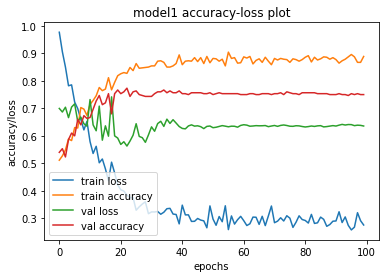

In [ ]:
# plotting FOR DATASET-1
plt.plot(list(model1.history.history.values())[0])
plt.plot(list(model1.history.history.values())[1])
plt.plot(list(model1.history.history.values())[2])
plt.plot(list(model1.history.history.values())[3])
plt.title('model1 accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

In [32]:
#CONFIG FOR DATASET-2
LR2 = 0.0001
LOSS2 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER2 = tf.keras.optimizers.Adam(learning_rate=LR2)
BATCH_SIZE2=32
EPOCHS2=50
METRICS2 = ['acc']
CALLBACKS2 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [33]:
#DATASET-2
model2.compile(loss=LOSS2, optimizer=OPTIMIZER2, metrics=METRICS2)
model2.fit(TrainX2, TrainY2, validation_data=(ValX2, ValY2),
          batch_size=BATCH_SIZE2,
          epochs=EPOCHS2,
          callbacks=CALLBACKS2,
          shuffle=True)

Epoch 1/50
267/267 [==============================] - 26s 91ms/step - loss: 0.9361 - acc: 0.5047 - val_loss: 0.6978 - val_acc: 0.5466
Epoch 2/50
267/267 [==============================] - 24s 90ms/step - loss: 0.7615 - acc: 0.5720 - val_loss: 0.6535 - val_acc: 0.6460
Epoch 3/50
267/267 [==============================] - 23s 87ms/step - loss: 0.6836 - acc: 0.6301 - val_loss: 0.5776 - val_acc: 0.6981
Epoch 4/50
267/267 [==============================] - 23s 88ms/step - loss: 0.6568 - acc: 0.6405 - val_loss: 0.5617 - val_acc: 0.7126
Epoch 5/50
267/267 [==============================] - 24s 89ms/step - loss: 0.6162 - acc: 0.6784 - val_loss: 0.6225 - val_acc: 0.7384
Epoch 6/50
267/267 [==============================] - 24s 89ms/step - loss: 0.5861 - acc: 0.7010 - val_loss: 0.5393 - val_acc: 0.7450
Epoch 7/50
267/267 [==============================] - 24s 90ms/step - loss: 0.5647 - acc: 0.7165 - val_loss: 0.6835 - val_acc: 0.7267
Epoch 8/50
267/267 [==============================] - 23s 87ms

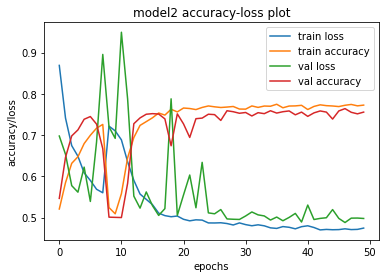

In [40]:
# plotting
plt.plot(list(model2.history.history.values())[0])
plt.plot(list(model2.history.history.values())[1])
plt.plot(list(model2.history.history.values())[2])
plt.plot(list(model2.history.history.values())[3])
plt.title('model2 accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

> Observations
- Using simple RNN from tensorflow has significantly improved the performance from from scratch RNN
- From scratch RNN has only one RNN layer and no pretrained embedding layer and no dense layers. This caused the model to have less performance compared to tensorflow implementation of RNN model
- simple RNN performed well on both train and val dataset with `89%` train accuracy and `75%` val accuracy for dataset-1
- simple RNN performed well on both train and val dataset with `77%` train accuracy and `75%` val accuracy. As our main aim is val accuracy, model is still better on dataset-2
- The architecture of the entire model is decided based on many experimentations.
- Same architecture is followed for LSTM and GRU model for dataset1 and dataset2
- Architecture is as follows
Input -> Embedding -> SimpleRNN -> SimpleRNN -> MaxPool1D -> Dense -> Dropout -> BatchNormalization -> Output
- The units in the layers are precisely choosen after a ton of experimentations on the model.

> **7. Implement inbuilt LSTM in tensorflow and add the same layers as above.**

In [34]:
#DATASET-1
input = tf.keras.Input(shape=(INP_LEN1,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN1+1, EMBED_DIM1, weights=[EMBEDDING_MATRIX1], trainable=False, name='embed')(input)
lstm1 = tf.keras.layers.LSTM(192, return_sequences=True, dropout=0.3, name='lstm1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(lstm1)
lstm2 = tf.keras.layers.LSTM(128, dropout=0.2, name='lstm2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(lstm2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

model3 = tf.keras.models.Model(inputs=input, outputs=output, name='model3')
model3.summary()

#DATASET-2
input = tf.keras.Input(shape=(INP_LEN2,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN2+1, EMBED_DIM2, weights=[EMBEDDING_MATRIX2], trainable=False, name='embed')(input)
lstm1 = tf.keras.layers.LSTM(192, return_sequences=True, dropout=0.3, name='lstm1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(lstm1)
lstm2 = tf.keras.layers.LSTM(128, dropout=0.2, name='lstm2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(lstm2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

model4 = tf.keras.models.Model(inputs=input, outputs=output, name='model4')
model4.summary()

Model: "model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 55)]              0         
_________________________________________________________________
embed (Embedding)            (None, 55, 300)           950400    
_________________________________________________________________
lstm1 (LSTM)                 (None, 55, 192)           378624    
_________________________________________________________________
pool (MaxPooling1D)          (None, 27, 192)           0         
_________________________________________________________________
lstm2 (LSTM)                 (None, 128)               164352    
_________________________________________________________________
dense1 (Dense)               (None, 84)                10836     
_________________________________________________________________
drop1 (Dropout)              (None, 84)                0    

In [ ]:
#CONFIG FOR DATASET-1
LR3 = 0.0001
LOSS3 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER3 = tf.keras.optimizers.Adam(learning_rate=LR3)
BATCH_SIZE3=16
EPOCHS3=100
METRICS3 = ['acc']
CALLBACKS3 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [ ]:
#DATASET-1
model3.compile(loss=LOSS3, optimizer=OPTIMIZER3, metrics=METRICS3)
model3.fit(TrainX1, TrainY1, validation_data=(ValX1, ValY1),
          batch_size=BATCH_SIZE3,
          epochs=EPOCHS3,
          callbacks=CALLBACKS3,
          shuffle=True)

Epoch 1/100
44/44 [==============================] - 4s 27ms/step - loss: 0.7036 - acc: 0.5648 - val_loss: 0.6925 - val_acc: 0.4633
Epoch 2/100
44/44 [==============================] - 0s 11ms/step - loss: 0.6595 - acc: 0.6473 - val_loss: 0.6868 - val_acc: 0.5100
Epoch 3/100
44/44 [==============================] - 0s 11ms/step - loss: 0.5522 - acc: 0.7647 - val_loss: 0.6647 - val_acc: 0.6300
Epoch 4/100
44/44 [==============================] - 0s 11ms/step - loss: 0.4794 - acc: 0.7822 - val_loss: 0.6307 - val_acc: 0.8033
Epoch 5/100
44/44 [==============================] - 0s 11ms/step - loss: 0.4402 - acc: 0.7938 - val_loss: 0.6105 - val_acc: 0.8000
Epoch 6/100
44/44 [==============================] - 0s 11ms/step - loss: 0.3429 - acc: 0.8505 - val_loss: 0.5819 - val_acc: 0.7733
Epoch 7/100
44/44 [==============================] - 0s 11ms/step - loss: 0.3753 - acc: 0.8590 - val_loss: 0.5085 - val_acc: 0.8367
Epoch 8/100
44/44 [==============================] - 0s 11ms/step - loss: 0.

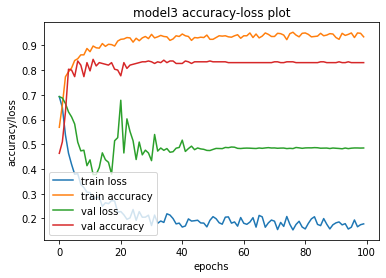

In [ ]:
# plotting FOR DATASET-1
plt.plot(list(model3.history.history.values())[0])
plt.plot(list(model3.history.history.values())[1])
plt.plot(list(model3.history.history.values())[2])
plt.plot(list(model3.history.history.values())[3])
plt.title('model3 accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

In [35]:
#CONFIG FOR DATASET-2
LR4 = 0.0001
LOSS4 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER4 = tf.keras.optimizers.Adam(learning_rate=LR4)
BATCH_SIZE4=32
EPOCHS4=50
METRICS4 = ['acc']
CALLBACKS4 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [36]:
#DATASET-2
model4.compile(loss=LOSS4, optimizer=OPTIMIZER4, metrics=METRICS4)
model4.fit(TrainX2, TrainY2, validation_data=(ValX2, ValY2),
          batch_size=BATCH_SIZE4,
          epochs=EPOCHS4,
          callbacks=CALLBACKS4,
          shuffle=True)

Epoch 1/50
267/267 [==============================] - 12s 29ms/step - loss: 0.6643 - acc: 0.6012 - val_loss: 0.6418 - val_acc: 0.6737
Epoch 2/50
267/267 [==============================] - 7s 26ms/step - loss: 0.5225 - acc: 0.7392 - val_loss: 0.5476 - val_acc: 0.7440
Epoch 3/50
267/267 [==============================] - 7s 26ms/step - loss: 0.5026 - acc: 0.7562 - val_loss: 0.5302 - val_acc: 0.7271
Epoch 4/50
267/267 [==============================] - 7s 26ms/step - loss: 0.4943 - acc: 0.7526 - val_loss: 0.4918 - val_acc: 0.7647
Epoch 5/50
267/267 [==============================] - 7s 26ms/step - loss: 0.4853 - acc: 0.7611 - val_loss: 0.5031 - val_acc: 0.7670
Epoch 6/50
267/267 [==============================] - 7s 26ms/step - loss: 0.4675 - acc: 0.7695 - val_loss: 0.4849 - val_acc: 0.7600
Epoch 7/50
267/267 [==============================] - 7s 26ms/step - loss: 0.4522 - acc: 0.7855 - val_loss: 0.5384 - val_acc: 0.7632
Epoch 8/50
267/267 [==============================] - 7s 26ms/step -

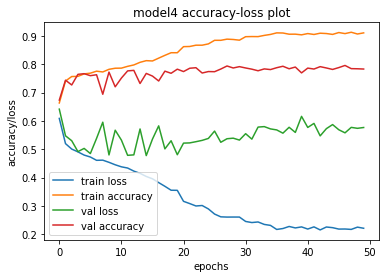

In [41]:
# plotting FOR DATASET-2
plt.plot(list(model4.history.history.values())[0])
plt.plot(list(model4.history.history.values())[1])
plt.plot(list(model4.history.history.values())[2])
plt.plot(list(model4.history.history.values())[3])
plt.title('model4 accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

> Observations
- LSTM is better compared to simple RNN layer
- LSTM performed well on both train and val dataset with `92%` train accuracy and `83%` val accuracy for dataset-1
- LSTM performed well on both train and val dataset with `90%` train accuracy and `78%` val accuracy for dataset-2
- Same architecture is followed for GRU model for dataset1 and dataset2
- Architecture is as follows
Input -> Embedding -> LSTM -> LSTM -> MaxPool1D -> Dense -> Dropout -> BatchNormalization -> Output

> **8. Implement inbuilt GRU in tensorflow and add the same layers as above.**

In [37]:
#DATASET-1
input = tf.keras.Input(shape=(INP_LEN1,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN1+1, EMBED_DIM1, weights=[EMBEDDING_MATRIX1], trainable=False, name='embed')(input)
gru1 = tf.keras.layers.GRU(192, return_sequences=True, dropout=0.3, name='gru1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(gru1)
gru2 = tf.keras.layers.GRU(128, dropout=0.2, name='gru2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(gru2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

model5 = tf.keras.models.Model(inputs=input, outputs=output, name='model5')
model5.summary()

#DATASET-2
input = tf.keras.Input(shape=(INP_LEN2,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN2+1, EMBED_DIM2, weights=[EMBEDDING_MATRIX2], trainable=False, name='embed')(input)
gru1 = tf.keras.layers.GRU(192, return_sequences=True, dropout=0.3, name='gru1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(gru1)
gru2 = tf.keras.layers.GRU(128, dropout=0.2, name='gru2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(gru2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

model6 = tf.keras.models.Model(inputs=input, outputs=output, name='model6')
model6.summary()

Model: "model5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 55)]              0         
_________________________________________________________________
embed (Embedding)            (None, 55, 300)           950400    
_________________________________________________________________
gru1 (GRU)                   (None, 55, 192)           284544    
_________________________________________________________________
pool (MaxPooling1D)          (None, 27, 192)           0         
_________________________________________________________________
gru2 (GRU)                   (None, 128)               123648    
_________________________________________________________________
dense1 (Dense)               (None, 84)                10836     
_________________________________________________________________
drop1 (Dropout)              (None, 84)                0    

In [ ]:
#CONFIG
LR5 = 0.003
LOSS5 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER5 = tf.keras.optimizers.Adam(learning_rate=LR5)
BATCH_SIZE5=16
EPOCHS5=100
METRICS5 = ['acc']
CALLBACKS5 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [ ]:
model5.compile(loss=LOSS5, optimizer=OPTIMIZER5, metrics=METRICS5)
model5.fit(TrainX1, TrainY1, validation_data=(ValX1, ValY1),
          batch_size=BATCH_SIZE5,
          epochs=EPOCHS5,
          callbacks=CALLBACKS5,
          shuffle=True)

Epoch 1/100
44/44 [==============================] - 4s 25ms/step - loss: 0.7596 - acc: 0.4551 - val_loss: 0.9241 - val_acc: 0.4567
Epoch 2/100
44/44 [==============================] - 0s 10ms/step - loss: 0.7457 - acc: 0.4842 - val_loss: 0.9168 - val_acc: 0.4567
Epoch 3/100
44/44 [==============================] - 0s 10ms/step - loss: 0.5997 - acc: 0.6728 - val_loss: 0.4907 - val_acc: 0.8167
Epoch 4/100
44/44 [==============================] - 0s 10ms/step - loss: 0.3961 - acc: 0.8495 - val_loss: 0.3562 - val_acc: 0.8300
Epoch 5/100
44/44 [==============================] - 0s 10ms/step - loss: 0.3358 - acc: 0.8383 - val_loss: 0.4114 - val_acc: 0.8600
Epoch 6/100
44/44 [==============================] - 0s 10ms/step - loss: 0.2046 - acc: 0.9181 - val_loss: 0.3781 - val_acc: 0.8700
Epoch 7/100
44/44 [==============================] - 0s 10ms/step - loss: 0.1887 - acc: 0.9313 - val_loss: 0.7676 - val_acc: 0.7400
Epoch 8/100
44/44 [==============================] - 0s 10ms/step - loss: 0.

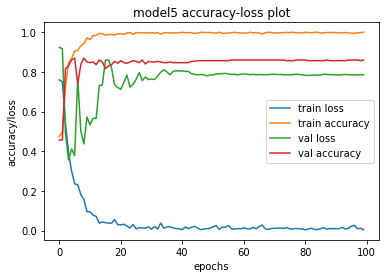

In [ ]:
# plotting
plt.plot(list(model5.history.history.values())[0])
plt.plot(list(model5.history.history.values())[1])
plt.plot(list(model5.history.history.values())[2])
plt.plot(list(model5.history.history.values())[3])
plt.title('model5 accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

In [42]:
#CONFIG
LR6 = 0.0001
LOSS6 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER6 = tf.keras.optimizers.Adam(learning_rate=LR6)
BATCH_SIZE6=32
EPOCHS6=50
METRICS6 = ['acc']
CALLBACKS6 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [45]:
model6.compile(loss=LOSS6, optimizer=OPTIMIZER6, metrics=METRICS6)
model6.fit(TrainX2, TrainY2, validation_data=(ValX2, ValY2),
          batch_size=BATCH_SIZE6,
          epochs=EPOCHS6,
          callbacks=CALLBACKS6,
          shuffle=True)

Epoch 1/50
267/267 [==============================] - 12s 31ms/step - loss: 0.7011 - acc: 0.5075 - val_loss: 0.6912 - val_acc: 0.6137
Epoch 2/50
267/267 [==============================] - 7s 28ms/step - loss: 0.6837 - acc: 0.5624 - val_loss: 0.6479 - val_acc: 0.5945
Epoch 3/50
267/267 [==============================] - 7s 28ms/step - loss: 0.5780 - acc: 0.7078 - val_loss: 0.5373 - val_acc: 0.7407
Epoch 4/50
267/267 [==============================] - 7s 28ms/step - loss: 0.5240 - acc: 0.7360 - val_loss: 0.5302 - val_acc: 0.7384
Epoch 5/50
267/267 [==============================] - 8s 28ms/step - loss: 0.5041 - acc: 0.7537 - val_loss: 0.5093 - val_acc: 0.7557
Epoch 6/50
267/267 [==============================] - 7s 28ms/step - loss: 0.4808 - acc: 0.7711 - val_loss: 0.4916 - val_acc: 0.7562
Epoch 7/50
267/267 [==============================] - 7s 28ms/step - loss: 0.4703 - acc: 0.7733 - val_loss: 0.5354 - val_acc: 0.7403
Epoch 8/50
267/267 [==============================] - 8s 28ms/step -

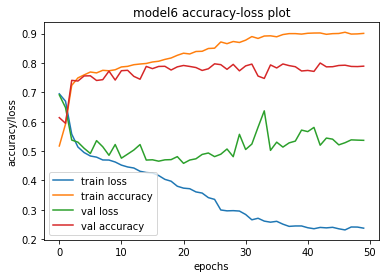

In [46]:
# plotting
plt.plot(list(model6.history.history.values())[0])
plt.plot(list(model6.history.history.values())[1])
plt.plot(list(model6.history.history.values())[2])
plt.plot(list(model6.history.history.values())[3])
plt.title('model6 accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

> Observations
- GRU is better compared to LSTM layer
- GRU performed well on both train and val dataset with `100%` train accuracy and `86%` val accuracy for dataset-1
- LSTM performed well on both train and val dataset with `89%` train accuracy and `78%` val accuracy for dataset-2
- Architecture is as follows
Input -> Embedding -> GRU -> GRU -> MaxPool1D -> Dense -> Dropout -> BatchNormalization -> Output

> **9. Compare accuracy for the above models and do a reasoning.**

### Dataset 1
| model name | Train loss | Train acc | Val loss | Val acc
|------------|------------|----------------|----------|--------
| `model1(RNN)` | `0.2564` | `0.8958` | `0.6357` | `0.7500`
| `model3(LSTM)` | `0.1962` | `0.9292` | `0.4849` | `0.8300`
| `model5(GRU)` | `0.0035` | `1.0000` | `0.7857` | `0.8600`

### Dataset 2
| model name | Train loss | Train acc | Val loss | Val acc
|------------|------------|----------------|----------|--------
| `model2(RNN)` | `0.4787` | `0.7721` | `0.4980` | `0.7557`
| `model4(LSTM)` | `0.2276` | `0.9081` | `0.5769` | `0.7834`
| `model5(GRU)` | `0.2356` | `0.8976` | `0.5364` | `0.7890`

# Task2
---



> **1. Combine the above two datasets to form a larger one.**

In [47]:
# functions to enable the task
def preprocess(df):
  """
  input: pandas dataframe with two columns, sent and label
  description: sentence text preprocessing
  """
  punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  stop_words=['the', 'a', 'and', 'is', 'be', 'will']

  sentences = df.iloc[:, 0].values
  ret = []
  for sent in sentences:
    sent = re.sub(r'https?://\S+|www\.\S+', '', sent)                           #removing urls
    sent = re.sub(r'<.*?>', '', sent)                                           #removing html elements
    sent = sent.lower()                                                         #lowering all characters
    for ch in sent:                                                             #removing punctuations
      if ch in punctuations:
        sent = sent.replace(ch, '')
    sent = ' '.join([word for word in sent.split() if word not in stop_words])  #removing stop words
    sent = re.sub(r'\s+', ' ', sent).strip()                                    #removing whitespaces
    ret.append(sent)
  ret = np.asarray(ret)

  df['sent'] = ret
  return df

# functions to enable the task
def convert_strs_to_integers(strs):
  tokenizer = Tokenizer()

  max_len = np.max([len(sent.split()) for sent in strs])                        #finding max length of sentence
  print("Max Length of sentence(also length of input): ", max_len)

  tokenizer.fit_on_texts(strs)                                                   #converting text to numbers
  vocab_len = len(tokenizer.word_index)
  print("Length of vocabulary: ", vocab_len)
  seq = tokenizer.texts_to_sequences(strs)

  padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')               #extending the length of sequence
                                                                                #to max length by padding
                                                                  
  return padded_seq, max_len, vocab_len, tokenizer

In [48]:
data = pd.concat([data1, data2], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data = preprocess(data)
display(data)

print("----------------------------------------------------------------------------")
print("::::::::::::::::::::::::::::::Combined Dataset::::::::::::::::::::::::::::::")
print("----------------------------------------------------------------------------")
X, INP_LEN, VOCAB_LEN, TOKENIZER=convert_strs_to_integers(data.iloc[:, 0].values)
Y=tf.one_hot(data.iloc[:, 1].values, depth=2).numpy()
TrainX, ValX, TrainY, ValY = train_test_split(X, Y, test_size=0.3, random_state=seed)
print("TrainX shape: ", TrainX.shape, " | ValX shape: ", ValX.shape, " | TrainY shape: ", TrainY.shape, " | ValY shape: ", ValY.shape)

,sent,label
0,if you can get past fantastical aspects harsh ...,1
1,somehow manages to escape shackles of its own ...,1
2,cumulative effect of watching this 65minute tr...,0
3,but buying into sham truths routine indie film...,0
4,just about best straightup oldschool horror fi...,1
...,...,...
11657,this case of pregnant premise being wasted by ...,0
11658,davis has energy but she doesnt bother to make...,0
11659,story gives ample opportunity for largescale a...,1
11660,for its 100 minutes running time youll wait in...,0


----------------------------------------------------------------------------
::::::::::::::::::::::::::::::Combined Dataset::::::::::::::::::::::::::::::
----------------------------------------------------------------------------
Max Length of sentence(also length of input):  55
Length of vocabulary:  21156
TrainX shape:  (8163, 55)  | ValX shape:  (3499, 55)  | TrainY shape:  (8163, 2)  | ValY shape:  (3499, 2)


> Observations
- Merged both the datasets into one, length of the combined dataset is `21156`.
- Same preprocessing as done in the case of dataset1 and dataset2 is performed.

> **2. Implement RNN, LSTM and GRU from tensorflow and tabulate the results.**

In [49]:
# functions to enable the task
def get_coefs(word, *arr): 
  return word, np.asarray(arr, dtype='float32')

def get_embeddings_matrix(embed_path, embed_dim, tokenizer, vocab_len):
  embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(embed_path, errors='ignore'))
  embedding_matrix = np.zeros((vocab_len + 1, embed_dim))
  for word, index in tokenizer.word_index.items():
    if index > vocab_len:
      break
    else:
      try:
          embedding_matrix[index] = embeddings_index[word]
      except:
          continue
  return embedding_matrix

In [50]:
# calling above functions to perform the task
# NOTE: This cell might take a while to run(around 5min), please DO NOR RE-RUN it!!(waste of time)

# glove.6B: https://drive.google.com/file/d/17QuRawroK6tXX7p3mwZiB4zEicNauvbi/view?usp=sharing
# glove.42B.300d: https://drive.google.com/file/d/1C4EF6dN5sE28XFm7CefcWBgzRwfF90Pz/view?usp=sharing
# glove.840B.300d: https://drive.google.com/file/d/1Otp9Q1hL5RY0Lv1pbJzcXTt1Xew7Uc3R/view?usp=sharing
# glove.twitter.27B: https://drive.google.com/file/d/16d15anhD8nRhorIy7RSF11RILk5AvaIY/view?usp=sharing

#glove.42B.300d.txt
# !gdown --id 1C4EF6dN5sE28XFm7CefcWBgzRwfF90Pz
# !unzip /content/glove.42B.300d.zip &> /dev/null
# !rm -rf /content/glove.42B.300d.zip &> /dev/null

embed_path = '/content/glove.42B.300d.txt'
EMBED_DIM = 300
EMBEDDING_MATRIX = get_embeddings_matrix(embed_path, EMBED_DIM, TOKENIZER, VOCAB_LEN)
print("Embeddings Matrix shape: ", EMBEDDING_MATRIX.shape)

Embeddings Matrix shape:  (21157, 300)


> Observations
- Same embedding as used for dataset1 and dataset2 is used.

In [109]:
#RNN model
input = tf.keras.Input(shape=(INP_LEN,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN+1, EMBED_DIM, weights=[EMBEDDING_MATRIX], trainable=False, name='embed')(input)
rnn1 = tf.keras.layers.SimpleRNN(192, return_sequences=True, dropout=0.3, name='rnn1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(rnn1)
rnn2 = tf.keras.layers.SimpleRNN(128, dropout=0.2, name='rnn2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(rnn2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

modelRNN = tf.keras.models.Model(inputs=input, outputs=output, name='modelRNN')
modelRNN.summary()

#LSTM model
input = tf.keras.Input(shape=(INP_LEN,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN+1, EMBED_DIM, weights=[EMBEDDING_MATRIX], trainable=False, name='embed')(input)
rnn1 = tf.keras.layers.LSTM(192, return_sequences=True, dropout=0.3, name='rnn1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(rnn1)
rnn2 = tf.keras.layers.LSTM(128, dropout=0.2, name='rnn2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(rnn2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

modelLSTM = tf.keras.models.Model(inputs=input, outputs=output, name='modelLSTM')
modelLSTM.summary()

#GRU model
input = tf.keras.Input(shape=(INP_LEN,), name='input')
embed = tf.keras.layers.Embedding(VOCAB_LEN+1, EMBED_DIM, weights=[EMBEDDING_MATRIX], trainable=False, name='embed')(input)
rnn1 = tf.keras.layers.GRU(192, return_sequences=True, dropout=0.3, name='rnn1')(embed)
pool = tf.keras.layers.MaxPool1D(name='pool')(rnn1)
rnn2 = tf.keras.layers.GRU(128, dropout=0.2, name='rnn2')(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu', name='dense1')(rnn2)
drop1 = tf.keras.layers.Dropout(0.2, name='drop1')(dense1)
norm1 = tf.keras.layers.BatchNormalization(name='norm1')(drop1)
output = tf.keras.layers.Dense(2, activation='softmax', name='output')(norm1)

modelGRU = tf.keras.models.Model(inputs=input, outputs=output, name='modelGRU')
modelGRU.summary()

Model: "modelRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 55)]              0         
_________________________________________________________________
embed (Embedding)            (None, 55, 300)           6347100   
_________________________________________________________________
rnn1 (SimpleRNN)             (None, 55, 192)           94656     
_________________________________________________________________
pool (MaxPooling1D)          (None, 27, 192)           0         
_________________________________________________________________
rnn2 (SimpleRNN)             (None, 128)               41088     
_________________________________________________________________
dense1 (Dense)               (None, 84)                10836     
_________________________________________________________________
drop1 (Dropout)              (None, 84)                0  

In [110]:
#CONFIG
LR7 = 0.001
LOSS7 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER7 = tf.keras.optimizers.Adam(learning_rate=LR7)
BATCH_SIZE7=32
EPOCHS7=10
METRICS7 = ['acc']
CALLBACKS7 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [111]:
modelRNN.compile(loss=LOSS7, optimizer=OPTIMIZER7, metrics=METRICS7)
modelRNN.fit(TrainX, TrainY, validation_data=(ValX, ValY),
          batch_size=BATCH_SIZE7,
          epochs=EPOCHS7,
          callbacks=CALLBACKS7,
          shuffle=True)

Epoch 1/10
256/256 [==============================] - 30s 108ms/step - loss: 0.8389 - acc: 0.4892 - val_loss: 0.6936 - val_acc: 0.5056
Epoch 2/10
256/256 [==============================] - 28s 109ms/step - loss: 0.7076 - acc: 0.5066 - val_loss: 0.6977 - val_acc: 0.4950
Epoch 3/10
256/256 [==============================] - 27s 106ms/step - loss: 0.6962 - acc: 0.5107 - val_loss: 0.6941 - val_acc: 0.5053
Epoch 4/10
256/256 [==============================] - 27s 106ms/step - loss: 0.7014 - acc: 0.4901 - val_loss: 0.7060 - val_acc: 0.5061
Epoch 5/10
256/256 [==============================] - 28s 108ms/step - loss: 0.6997 - acc: 0.4926 - val_loss: 0.6997 - val_acc: 0.4939
Epoch 6/10
256/256 [==============================] - 27s 106ms/step - loss: 0.6973 - acc: 0.4942 - val_loss: 0.6939 - val_acc: 0.4939

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/10
256/256 [==============================] - 26s 103ms/step - loss: 0.6957 - acc: 0.5032 - val_loss:

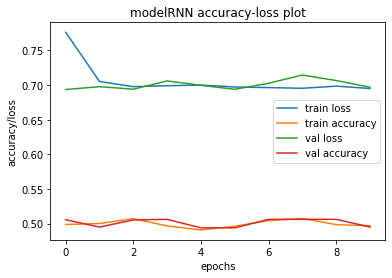

In [112]:
# plotting
plt.plot(list(modelRNN.history.history.values())[0])
plt.plot(list(modelRNN.history.history.values())[1])
plt.plot(list(modelRNN.history.history.values())[2])
plt.plot(list(modelRNN.history.history.values())[3])
plt.title('modelRNN accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

In [113]:
#CONFIG
LR8 = 0.0003
LOSS8 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER8 = tf.keras.optimizers.Adam(learning_rate=LR8)
BATCH_SIZE8=32
EPOCHS8=10
METRICS8 = ['acc']
CALLBACKS8 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [114]:
modelLSTM.compile(loss=LOSS8, optimizer=OPTIMIZER8, metrics=METRICS8)
modelLSTM.fit(TrainX, TrainY, validation_data=(ValX, ValY),
          batch_size=BATCH_SIZE8,
          epochs=EPOCHS8,
          callbacks=CALLBACKS8,
          shuffle=True)

Epoch 1/10
256/256 [==============================] - 12s 31ms/step - loss: 0.6183 - acc: 0.6568 - val_loss: 0.6492 - val_acc: 0.7102
Epoch 2/10
256/256 [==============================] - 7s 27ms/step - loss: 0.5003 - acc: 0.7567 - val_loss: 0.5474 - val_acc: 0.7619
Epoch 3/10
256/256 [==============================] - 7s 27ms/step - loss: 0.4922 - acc: 0.7555 - val_loss: 0.4715 - val_acc: 0.7748
Epoch 4/10
256/256 [==============================] - 7s 27ms/step - loss: 0.4718 - acc: 0.7697 - val_loss: 0.6031 - val_acc: 0.6490
Epoch 5/10
256/256 [==============================] - 7s 27ms/step - loss: 0.4600 - acc: 0.7738 - val_loss: 0.4721 - val_acc: 0.7682
Epoch 6/10
256/256 [==============================] - 7s 27ms/step - loss: 0.4415 - acc: 0.7879 - val_loss: 0.4673 - val_acc: 0.7851
Epoch 7/10
256/256 [==============================] - 7s 27ms/step - loss: 0.4276 - acc: 0.7977 - val_loss: 0.4784 - val_acc: 0.7662
Epoch 8/10
256/256 [==============================] - 7s 27ms/step -

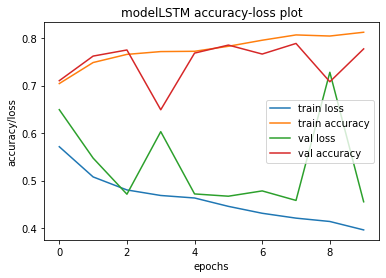

In [115]:
# plotting
plt.plot(list(modelLSTM.history.history.values())[0])
plt.plot(list(modelLSTM.history.history.values())[1])
plt.plot(list(modelLSTM.history.history.values())[2])
plt.plot(list(modelLSTM.history.history.values())[3])
plt.title('modelLSTM accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

In [116]:
#CONFIG
LR9 = 0.0009
LOSS9 = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER9 = tf.keras.optimizers.Adam(learning_rate=LR9)
BATCH_SIZE9=32
EPOCHS9=10
METRICS9 = ['acc']
CALLBACKS9 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000001, cooldown=1, verbose=1)]

In [117]:
modelGRU.compile(loss=LOSS9, optimizer=OPTIMIZER9, metrics=METRICS9)
modelGRU.fit(TrainX, TrainY, validation_data=(ValX, ValY),
          batch_size=BATCH_SIZE9,
          epochs=EPOCHS9,
          callbacks=CALLBACKS9,
          shuffle=True)

Epoch 1/10
256/256 [==============================] - 12s 31ms/step - loss: 0.7040 - acc: 0.4992 - val_loss: 0.6991 - val_acc: 0.5050
Epoch 2/10
256/256 [==============================] - 7s 28ms/step - loss: 0.5932 - acc: 0.6848 - val_loss: 0.8445 - val_acc: 0.5593
Epoch 3/10
256/256 [==============================] - 7s 28ms/step - loss: 0.4801 - acc: 0.7669 - val_loss: 0.5310 - val_acc: 0.7454
Epoch 4/10
256/256 [==============================] - 7s 28ms/step - loss: 0.4225 - acc: 0.7995 - val_loss: 0.4389 - val_acc: 0.7914
Epoch 5/10
256/256 [==============================] - 7s 29ms/step - loss: 0.3892 - acc: 0.8154 - val_loss: 0.4431 - val_acc: 0.7954
Epoch 6/10
256/256 [==============================] - 7s 28ms/step - loss: 0.3742 - acc: 0.8305 - val_loss: 0.4258 - val_acc: 0.8037
Epoch 7/10
256/256 [==============================] - 7s 28ms/step - loss: 0.3440 - acc: 0.8494 - val_loss: 0.4147 - val_acc: 0.8051
Epoch 8/10
256/256 [==============================] - 7s 28ms/step -

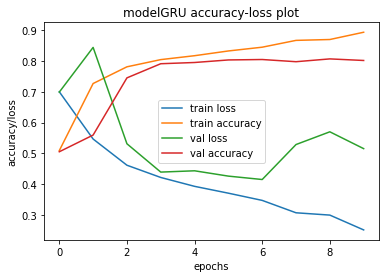

In [118]:
# plotting
plt.plot(list(modelGRU.history.history.values())[0])
plt.plot(list(modelGRU.history.history.values())[1])
plt.plot(list(modelGRU.history.history.values())[2])
plt.plot(list(modelGRU.history.history.values())[3])
plt.title('modelGRU accuracy-loss plot')
plt.ylabel('accuracy/loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'train accuracy', 'val loss', 'val accuracy'])
plt.show()

> Observations: 
- due to time constraint, couldn't train for larger epochs
- so the observations are minimal
- Simple RNN did not perform well on the combined dataset
- LSTM on the other hand performed relly well, only by training for 10 epochs
- GRU outperformed LSTM on training under almost similar conditions, except learning rate
- Both LSTM and GRU didnot train better with same learning rate
- GRU required smaller learning rate compared to LSTM to train better

| Layer Used | Train loss | Train acc | Val loss | Val acc
|------------|------------|-----------|----------|--------
| RNN        | `0.6942` | `0.5037` | `0.6969` | `0.4950`
| LSTM       | `0.3882` | `0.8127` | `0.4556` | `0.7771`
| GRU        | `0.2414` | `0.8992` | `0.5151` | `0.8019`